# Results
This notebook show the paper results

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import re

In [9]:
pd.options.display.max_rows = 500
FIGDIR = "../paper/figs/"

In [10]:
%matplotlib widget

In [11]:
#%matplotlib widget
%matplotlib inline

In [67]:
projects = pd.read_pickle('projects.zip')
releases = pd.read_pickle('releases.zip')

## Histogram of releases

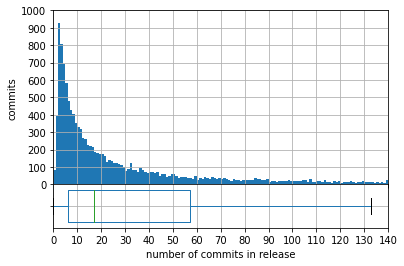

In [13]:
#fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

fig = plt.figure()
gs = fig.add_gridspec(5, 1, hspace=0, wspace=0)

ax_hist = fig.add_subplot(gs[0:4, :])
hist_lim = releases['commits'].quantile(0.75)+(releases['commits'].quantile(0.75)-releases['commits'].quantile(0.25))*1.5

releases.hist(['commits'], ax=ax_hist, bins=np.arange(0,141))
ax_hist.set_xticks(np.arange(0,141,10))
ax_hist.set_xticklabels([])
ax_hist.set_xlim((0,140))
ax_hist.set_yticks(np.arange(0,1001,100))
ax_hist.set_ylabel("commits")

#ax_hist_out = fig.add_subplot(gs[0:3, -1])
#releases.hist(['commits'], ax=ax_hist_out, bins=np.arange(140,1000))
#ax_hist_out.set_xlim((140,max))
#ax_hist_out.set_yticks(np.arange(0,1001,100))
#ax_hist_out.set_yticklabels([])


ax_box = fig.add_subplot(gs[-1, :])
releases.boxplot(['commits'], ax=ax_box, vert=False, showfliers=False, widths=[0.75])
ax_box.set_xticks(np.arange(0,141,10))
ax_box.set_xlim((0,140))
ax_box.set_yticklabels([])
ax_box.set_xlabel("number of commits in release")

#ax_box_out = fig.add_subplot(gs[-1, -1])
#releases.boxplot(['commits'], ax=ax_box_out, vert=False, showfliers=True)
#ax_box_out.set_xlim((140,max))

ax_hist.set_title("")
fig.savefig(FIGDIR+'release_histogram')

## Number of releases

In [14]:
len(releases)

14126

In [15]:
releases.commits.median()

17.0

In [16]:
len(releases[releases.commits == 0])

85

In [17]:
releases.commits.max()

35800

In [18]:
releases[releases.commits > 3000]

,project,name,lang,head,time,commits,base_releases,range_commits,range_base_releases,range_tpos,...,range_fneg,time_commits,time_base_releases,time_tpos,time_fpos,time_fneg,range_precision,range_recall,time_precision,time_recall
35,twbs/bootstrap,v4.0.0,javascript,8a628b943cf31ca0a002c08af661a95772480225,2018-01-18 18:29:48+00:00,5969,"[v3.3.6, v3.3.1, v3.3.4, v3.2.0, v3.3.2, v3.3....",5969,[v3.4.1],5969,...,0,0,[v3.4.1],0,0,5969,1.0000,1.000000,1.000000,0.000000
238,storybookjs/storybook,v4.0.0,typescript,8dd9bb346153221c02ed495e43ba02bd73271875,2018-10-29 02:30:32+00:00,3575,[v3.4.0],3575,[v3.4.12],3575,...,0,0,[v3.4.12],0,0,3575,1.0000,1.000000,1.000000,0.000000
325,storybookjs/storybook,v6.0.0,typescript,b97e2eed2fce5e124eb825e2a3c768cf8e134219,2020-08-11 06:35:24+00:00,5156,"[v5.3.0, v5.3.7, v5.3.3, v5.3.8, v5.3.4, v5.2.0]",5156,[v5.3.21],5156,...,0,0,[v5.3.21],0,0,5156,1.0000,1.000000,1.000000,0.000000
26,ionic-team/ionic-framework,v2.0.0,typescript,1ef21f462276b40a57a54cd30f1c4397cd0c2468,2017-01-24 22:00:59+00:00,5645,[],5645,[v1.3.2],5645,...,0,449,[v1.3.2],449,0,5196,1.0000,1.000000,1.000000,0.079539
122,elastic/elasticsearch,v2.0.0,java,de54438d6af8f9340d50c5c786151783ce7d6be5,2015-10-21 21:01:03+00:00,8227,[v1.0.0],8227,[v1.7.6],8227,...,0,0,[v1.7.6],0,0,8227,1.0000,1.000000,1.000000,0.000000
144,elastic/elasticsearch,v5.0.0,java,253032b4a7818992af360097e3ddc1475fa7b044,2016-10-26 03:08:59+00:00,9294,"[v2.1.0, v2.0.0]",9294,[v2.4.6],9294,...,0,0,[v2.4.6],0,0,9294,1.0000,1.000000,1.000000,0.000000
181,elastic/elasticsearch,v6.0.0,java,8f0685b924b9159807704ec2593b26e28105da44,2017-11-14 16:59:08+00:00,4607,[v5.0.0],4607,[v5.6.16],4607,...,0,0,[v5.6.16],0,0,4607,1.0000,1.000000,1.000000,0.000000
193,elastic/elasticsearch,v6.3.0,java,424e937a209c06d6717989ef5a10ea557049c7f1,2018-06-13 16:14:10+00:00,8582,[v6.2.0],8582,[v6.2.4],8582,...,0,2387,[v6.2.4],445,1942,8137,1.0000,1.000000,0.186426,0.051853
224,elastic/elasticsearch,v7.0.0,java,b7e28a7232616c7a21bc879a535d801b8553ba77,2019-04-10 15:41:52+00:00,10555,"[v6.0.0, v5.0.0, v6.3.0]",10555,[v6.8.12],10555,...,0,0,[v6.8.12],0,0,10555,1.0000,1.000000,1.000000,0.000000
65,spring-projects/spring-boot,v2.0.0.RELEASE,java,97a71be9b8e2cf4b2fe0625896975865d6a8fdab,2018-03-01 04:42:15+00:00,4535,"[v1.5.9.RELEASE, v1.5.1.RELEASE, v1.5.7.RELEAS...",4482,[v1.5.22.RELEASE],4482,...,53,0,[v1.5.22.RELEASE],0,0,4535,1.0000,0.988313,1.000000,0.000000


# Tests

In [19]:
def effect_size(a,b):
    mean_a = a.mean()
    mean_b = b.mean()
    std = (((a.std() + a.std())**2)/2)**(1/2)
    effect_size = (mean_a - mean_b) / std
    return effect_size

## Comparing strategies
- wilcoxon - 100 projects, paired

H0 - The 2 strategies have tha same precision and recall

In [20]:
res_bp = releases.groupby(['project']).mean()[['range_precision','range_recall','time_precision', 'time_recall']]

In [21]:
res_bp.mean()

range_precision    0.986089
range_recall       0.996536
time_precision     0.655773
time_recall        0.911995
dtype: float64

### Precision

In [22]:
stats.shapiro(res_bp['range_precision'])

ShapiroResult(statistic=0.5591316819190979, pvalue=7.675732099888481e-16)

In [23]:
stats.shapiro(res_bp['time_precision'])

ShapiroResult(statistic=0.9453591704368591, pvalue=0.0004155845963396132)

In [24]:
stats.wilcoxon(res_bp['range_precision'], res_bp['time_precision'])

WilcoxonResult(statistic=0.0, pvalue=3.896559845095909e-18)

In [25]:
effect_size(res_bp['range_precision'], res_bp['time_precision'])

8.290161042693319

### Recall

In [26]:
stats.shapiro(res_bp['range_recall'])

ShapiroResult(statistic=0.28416305780410767, pvalue=7.191548312096943e-20)

In [27]:
stats.shapiro(res_bp['time_recall'])

ShapiroResult(statistic=0.8881964087486267, pvalue=4.101560762137524e-07)

In [28]:
stats.wilcoxon(res_bp['range_recall'], res_bp['time_recall'])

WilcoxonResult(statistic=0.0, pvalue=3.896559845095909e-18)

In [29]:
effect_size(res_bp['range_recall'], res_bp['time_recall'])

4.61152558690681

### Graphs

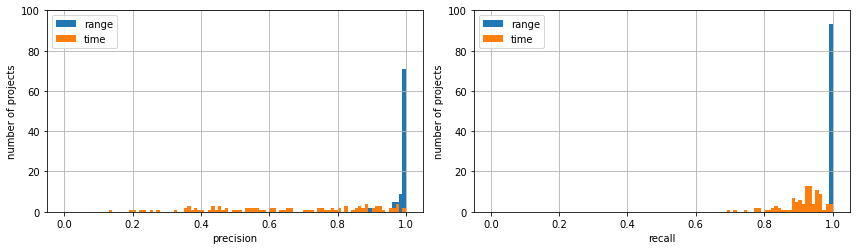

In [30]:
fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(5, 2)

ax_hist_precision = fig.add_subplot(gs[0:4, 0])
res_bp.hist(['range_precision'], ax=ax_hist_precision, bins=np.arange(0,1.01,0.01))
res_bp.hist(['time_precision'], ax=ax_hist_precision, bins=np.arange(0,1.01,0.01))
ax_hist_precision.set_title("")
ax_hist_precision.set_xlabel("precision")
ax_hist_precision.set_ylabel("number of projects")
ax_hist_precision.set_ylim((0,100))
ax_hist_precision.legend(['range','time'], loc=2)

ax_hist_recall = fig.add_subplot(gs[0:4, 1])
res_bp.hist(['range_recall'], ax=ax_hist_recall, bins=np.arange(0,1.01,0.01))
res_bp.hist(['time_recall'], ax=ax_hist_recall, bins=np.arange(0,1.01,0.01))
ax_hist_recall.set_title("")
ax_hist_recall.set_ylabel("number of projects")
ax_hist_recall.set_xlabel("recall")
ax_hist_recall.set_ylim((0,100))
ax_hist_recall.legend(['range','time'], loc=2)

fig.tight_layout()
fig.savefig(FIGDIR+'precision_recall_histogram_by_strategy')

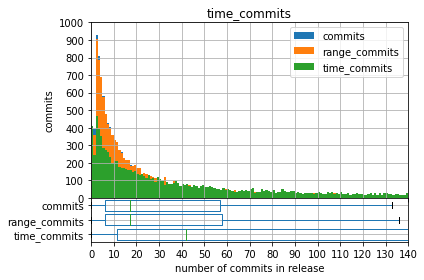

In [31]:
fig = plt.figure()
gs = fig.add_gridspec(5, 1, hspace=0, wspace=0)

ax_hist = fig.add_subplot(gs[0:4, :])
hist_lim = releases['commits'].quantile(0.75)+(releases['commits'].quantile(0.75)-releases['commits'].quantile(0.25))*1.5

releases.hist(['commits'], ax=ax_hist, bins=np.arange(0,141))
releases.hist(['range_commits'], ax=ax_hist, bins=np.arange(0,141))
releases.hist(['time_commits'], ax=ax_hist, bins=np.arange(0,141))
ax_hist.set_xticks(np.arange(0,141,10))
ax_hist.set_xticklabels([])
ax_hist.set_xlim((0,140))
ax_hist.set_yticks(np.arange(0,1001,100))
ax_hist.set_ylabel("commits")
ax_hist.legend(['commits', 'range_commits', 'time_commits'])

ax_box = fig.add_subplot(gs[-1, :])
releases.boxplot(['time_commits', 'range_commits', 'commits'], ax=ax_box, vert=False, showfliers=False, widths=[0.75,0.75,0.75])
ax_box.set_xticks(np.arange(0,141,10))
ax_box.set_xlim((0,140))
#ax_box.set_yticklabels([])
ax_box.set_xlabel("number of commits in release")

fig.tight_layout()
fig.savefig(FIGDIR+'release_histogram_by_strategy')

## Comparing size

In [32]:
projects = releases.groupby(['lang','project']).mean()[['range_precision','range_recall','time_precision', 'time_recall']]
projects = projects.reset_index(level=['lang'])

In [33]:
projects_size = pd.DataFrame(releases.groupby(['project'])['commits'].sum())
median = projects_size.median().iloc[0]
projects_size.loc[projects_size['commits'] <= median, 'size'] = 'S'
projects_size.loc[projects_size['commits'] > median, 'size'] = 'L'

In [34]:
projects = projects.join(projects_size, on=['project'])

In [35]:
projects.head()

,lang,range_precision,range_recall,time_precision,time_recall,commits,size
project,,,,,,,
allinurl/goaccess,c,1.000000,1.0,0.565154,0.933302,5544,S
arendst/Tasmota,c,0.993902,1.0,0.805578,0.960280,8356,L
ggreer/the_silver_searcher,c,1.000000,1.0,0.910205,0.961298,1997,S
mpv-player/mpv,c,1.000000,1.0,0.546669,0.896915,49278,L
netdata/netdata,c,1.000000,1.0,0.995671,0.997238,11250,L


## Compare Size
H0 - the mean precision is equivalent independent of the project size

In [36]:
small_projects = projects[projects['size'] == 'S']
big_projects = projects[projects['size'] == 'L']

### Precision

Duvidas
 - comparar small com big? ou small range com small time?

In [40]:
stats.shapiro(small_projects['range_precision'])

ShapiroResult(statistic=0.5971769094467163, pvalue=1.7688839282214985e-10)

In [41]:
stats.shapiro(big_projects['range_precision'])

ShapiroResult(statistic=0.5708330273628235, pvalue=7.359171605436643e-11)

In [42]:
stats.shapiro(small_projects['time_precision'])

ShapiroResult(statistic=0.9049622416496277, pvalue=0.0007035973249003291)

In [43]:
stats.shapiro(big_projects['time_precision'])
# é normal?

ShapiroResult(statistic=0.9569402933120728, pvalue=0.06618815660476685)

In [44]:
stats.wilcoxon(small_projects['range_precision'], big_projects['range_precision'])

WilcoxonResult(statistic=393.0, pvalue=0.46449558585401407)

In [45]:
stats.wilcoxon(small_projects['time_precision'], big_projects['time_precision'])
# time varia com o tamanho do projeto

WilcoxonResult(statistic=152.0, pvalue=2.776905161409715e-06)

In [46]:
stats.wilcoxon(small_projects['range_precision'], small_projects['time_precision'])

WilcoxonResult(statistic=0.0, pvalue=7.556929455863566e-10)

In [47]:
stats.wilcoxon(big_projects['range_precision'],  big_projects['time_precision'])

WilcoxonResult(statistic=0.0, pvalue=7.556929455863566e-10)

### Recall

In [48]:
stats.shapiro(small_projects['range_recall'])

ShapiroResult(statistic=0.30388760566711426, pvalue=5.04397583000072e-14)

In [49]:
stats.shapiro(big_projects['range_recall'])

ShapiroResult(statistic=0.2678012251853943, pvalue=2.2179408646055138e-14)

In [50]:
stats.shapiro(small_projects['time_recall'])

ShapiroResult(statistic=0.8631396293640137, pvalue=3.579869371606037e-05)

In [51]:
stats.shapiro(big_projects['time_recall'])

ShapiroResult(statistic=0.8923983573913574, pvalue=0.00027213807334192097)

In [52]:
stats.wilcoxon(small_projects['range_recall'], big_projects['range_recall'])

WilcoxonResult(statistic=188.0, pvalue=0.5235489109355372)

In [53]:
stats.wilcoxon(small_projects['time_recall'], big_projects['time_recall'])
# time varia com o tamanho do projeto

WilcoxonResult(statistic=369.0, pvalue=0.009544603414181752)

In [54]:
stats.wilcoxon(small_projects['range_recall'], small_projects['time_recall'])

WilcoxonResult(statistic=0.0, pvalue=7.556929455863566e-10)

In [55]:
stats.wilcoxon(big_projects['range_recall'],  big_projects['time_recall'])

WilcoxonResult(statistic=0.0, pvalue=7.556929455863566e-10)

## Compare Language

In [56]:
projects_lang = projects.groupby('lang').mean()
projects_lang

,range_precision,range_recall,time_precision,time_recall,commits
lang,,,,,
c,0.989246,0.991885,0.763420,0.928667,13306.7
c#,0.972875,0.983214,0.693249,0.899657,6518.2
c++,0.984118,0.999120,0.564558,0.876552,17045.0
go,0.996905,0.999646,0.688852,0.926211,9761.0
java,0.979764,0.996569,0.544477,0.920623,17562.4
javascript,0.992503,0.999545,0.648513,0.907081,18816.6
php,0.970885,0.998934,0.585552,0.920980,12916.7
python,0.993728,0.998673,0.647853,0.921674,17388.3
ruby,0.998150,0.999520,0.754143,0.927710,13443.4


### Precision
Duvida:
 - Comparar entre linguagens? ou
 - Comparar se em uma mesma linguagem a gente tem mudança entre as abordagens? <- essa parece melhor
   - Neste caso, seriam vários wilcoxon? ou daria para usar friedman?

In [57]:
stats.kruskal(
    projects.loc[projects['lang'] == 'c', 'range_precision'],
    projects.loc[projects['lang'] == 'c#', 'range_precision'],
    projects.loc[projects['lang'] == 'c++', 'range_precision'],
    projects.loc[projects['lang'] == 'go', 'range_precision'],
    projects.loc[projects['lang'] == 'java', 'range_precision'],
    projects.loc[projects['lang'] == 'javascript', 'range_precision'],
    projects.loc[projects['lang'] == 'php', 'range_precision'],
    projects.loc[projects['lang'] == 'python', 'range_precision'],
    projects.loc[projects['lang'] == 'ruby', 'range_precision'],
    projects.loc[projects['lang'] == 'typescript', 'range_precision']
)

KruskalResult(statistic=14.128636363636339, pvalue=0.11782239742147922)

In [58]:
stats.kruskal(
    projects.loc[projects['lang'] == 'c', 'time_precision'],
    projects.loc[projects['lang'] == 'c#', 'time_precision'],
    projects.loc[projects['lang'] == 'c++', 'time_precision'],
    projects.loc[projects['lang'] == 'go', 'time_precision'],
    projects.loc[projects['lang'] == 'java', 'time_precision'],
    projects.loc[projects['lang'] == 'javascript', 'time_precision'],
    projects.loc[projects['lang'] == 'php', 'time_precision'],
    projects.loc[projects['lang'] == 'python', 'time_precision'],
    projects.loc[projects['lang'] == 'ruby', 'time_precision'],
    projects.loc[projects['lang'] == 'typescript', 'time_precision']
)

KruskalResult(statistic=9.40491089108906, pvalue=0.40076726216041725)

### Recall

In [59]:
stats.kruskal(
    projects.loc[projects['lang'] == 'c', 'range_recall'],
    projects.loc[projects['lang'] == 'c#', 'range_recall'],
    projects.loc[projects['lang'] == 'c++', 'range_recall'],
    projects.loc[projects['lang'] == 'go', 'range_recall'],
    projects.loc[projects['lang'] == 'java', 'range_recall'],
    projects.loc[projects['lang'] == 'javascript', 'range_recall'],
    projects.loc[projects['lang'] == 'php', 'range_recall'],
    projects.loc[projects['lang'] == 'python', 'range_recall'],
    projects.loc[projects['lang'] == 'ruby', 'range_recall'],
    projects.loc[projects['lang'] == 'typescript', 'range_recall']
)

KruskalResult(statistic=9.799119962945792, pvalue=0.3669911655326161)

In [60]:
stats.kruskal(
    projects.loc[projects['lang'] == 'c', 'time_recall'],
    projects.loc[projects['lang'] == 'c#', 'time_recall'],
    projects.loc[projects['lang'] == 'c++', 'time_recall'],
    projects.loc[projects['lang'] == 'go', 'time_recall'],
    projects.loc[projects['lang'] == 'java', 'time_recall'],
    projects.loc[projects['lang'] == 'javascript', 'time_recall'],
    projects.loc[projects['lang'] == 'php', 'time_recall'],
    projects.loc[projects['lang'] == 'python', 'time_recall'],
    projects.loc[projects['lang'] == 'ruby', 'time_recall'],
    projects.loc[projects['lang'] == 'typescript', 'time_recall']
)

KruskalResult(statistic=5.818455445544544, pvalue=0.7579415934151683)

In [66]:
projects[(projects['range_precision'] < projects['time_precision']) & (projects['range_recall'] > projects['time_recall'])]

,lang,range_precision,range_recall,time_precision,time_recall,commits,size
project,,,,,,,


In [26]:
releases.groupby(['lang', 'project']).mean().groupby('lang').mean()[['range_precision','range_recall','time_precision', 'time_recall']]

,range_precision,range_recall,time_precision,time_recall
lang,,,,
c,0.989246,0.991885,0.763420,0.928667
c#,0.972875,0.983214,0.693249,0.899657
c++,0.984118,0.999120,0.564558,0.876552
go,0.996905,0.999646,0.688852,0.926211
java,0.979764,0.996569,0.544477,0.920623
javascript,0.992503,0.999545,0.648513,0.907081
php,0.970885,0.998934,0.585552,0.920980
python,0.993728,0.998673,0.647853,0.921674
ruby,0.998150,0.999520,0.754143,0.927710


In [27]:
releases.groupby(['project']).mean().mean()[['range_precision','range_recall','time_precision', 'time_recall']]

range_precision    0.986089
range_recall       0.996536
time_precision     0.655773
time_recall        0.911995
dtype: float64

In [103]:
releases.groupby(['lang', 'project']).mean()[['range_precision','range_recall','time_precision', 'time_recall']]

range_precision  \
lang       project                                                             
c          allinurl/goaccess                                        1.000000   
           arendst/Tasmota                                          0.993902   
           ggreer/the_silver_searcher                               1.000000   
           mpv-player/mpv                                           1.000000   
           netdata/netdata                                          1.000000   
           nginx/nginx                                              0.999475   
           obsproject/obs-studio                                    0.999975   
           radareorg/radare2                                        1.000000   
           taosdata/TDengine                                        0.899112   
           tmux/tmux                                                1.000000   
c#         AutoMapper/AutoMapper                                    1.000000   
           MaterialDesignInXAML/MaterialDesignInXamlToolkit         0.998825   
           ShareX/ShareX                                            1.000000   
           SignalR/SignalR                                          1.000000   
           Wox-launcher/Wox                                         0.973684   
           aspnetboilerplate/aspnetboilerplate                      0.986190   
           cefsharp/CefSharp                                        0.980903   
           dotnet/efcore                                            0.861097   
           icsharpcode/ILSpy                                        1.000000   
           jellyfin/jellyfin                                        0.928050   
c++        aria2/aria2                                              0.985750   
           bitcoin/bitcoin                                          0.977067   
           electron/electron                                        0.997561   
           godotengine/godot                                        1.000000   
           microsoft/PowerToys                                      0.999711   
           ocornut/imgui                                            1.000000   
           opencv/opencv                                            0.892497   
           protocolbuffers/protobuf                                 0.988596   
           pytorch/pytorch                                          1.000000   
           tesseract-ocr/tesseract                                  1.000000   
go         astaxie/beego                                            0.999702   
           etcd-io/etcd                                             1.000000   
           gogs/gogs                                                1.000000   
           gohugoio/hugo                                            0.994978   
           hashicorp/terraform                                      1.000000   
           istio/istio                                              0.999899   
           prometheus/prometheus                                    0.977678   
           rclone/rclone                                            1.000000   
           traefik/traefik                                          1.000000   
           v2ray/v2ray-core                                         0.996793   
java       PhilJay/MPAndroidChart                                   1.000000   
           alibaba/fastjson                                         0.967328   
           apache/dubbo                                             0.985109   
           bumptech/glide                                           1.000000   
           ctripcorp/apollo                                         1.000000   
           elastic/elasticsearch                                    1.000000   
           netty/netty                                              0.991238   
           spring-projects/spring-boot                              0.867198   
           spring-projects/spring-framework                  

In [63]:
releases[releases.project == "nginx/nginx"].sort_values('range_recall')

,project,name,lang,head,time,commits,range_commits,range_tpos,range_fpos,range_fneg,time_commits,time_tpos,time_fpos,time_fneg,range_precision,range_recall,time_precision,time_recall
413,nginx/nginx,release-1.5.0,c,18f6d20cf721f814c9ef541aba596f8f93c5352e,2013-05-06 09:52:36+00:00,6,5,5,0,1,0,0,0,6,1.0,0.833333,1.000000,0.0
388,nginx/nginx,release-1.3.0,c,479e06d88b14ea2b4512545825ccce48ca7ec028,2012-05-15 14:23:49+00:00,25,24,24,0,1,0,0,0,25,1.0,0.960000,1.000000,0.0
359,nginx/nginx,release-1.1.0,c,9519d882f1701f99ff1cc88fb412b8847c0d888b,2011-08-01 14:47:40+00:00,31,30,30,0,1,0,0,0,31,1.0,0.967742,1.000000,0.0
360,nginx/nginx,release-1.1.1,c,07f0b19c404fb4598e6ef53c6a3bc86659b99d41,2011-08-22 13:56:08+00:00,33,33,33,0,0,33,33,0,0,1.0,1.000000,1.000000,1.0
358,nginx/nginx,release-1.0.15,c,6350cc9101cf6098b462adcef34fb8ce28c438f7,2012-04-12 13:00:53+00:00,4,4,4,0,0,54,4,50,0,1.0,1.000000,0.074074,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,nginx/nginx,release-0.5.38,c,6723f05fe4e6a6bef9c419a2016367fbe976c400,2009-09-14 13:17:16+00:00,5,5,5,0,0,1015,5,1010,0,1.0,1.000000,0.004926,1.0
167,nginx/nginx,release-0.5.37,c,5988ef5f4e322bcb423de19cc8db99b69e998585,2008-07-07 12:09:02+00:00,8,8,8,0,0,118,8,110,0,1.0,1.000000,0.067797,1.0
166,nginx/nginx,release-0.5.36,c,0716be9d6412b6f8605fae5997b22ef01c55d936,2008-05-04 11:17:13+00:00,10,10,10,0,0,144,10,134,0,1.0,1.000000,0.069444,1.0
180,nginx/nginx,release-0.6.11,c,68f111fe4f07c099f52affef44be29829d86f006,2007-09-11 13:15:48+00:00,14,14,14,0,0,14,14,0,0,1.0,1.000000,1.000000,1.0


In [17]:
releases.median()[['commits','range_commits','time_commits']].astype(int)

<ipython-input-17-e9f975d786a8>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  releases.median()[['commits','range_commits','time_commits']].astype(int)


commits          17
range_commits    17
time_commits     42
dtype: int32

In [18]:
pd.DataFrame([
    releases[releases.commits <= releases.commits.median()][['range_precision','range_recall','time_precision', 'time_recall']].mean(),
    releases[releases.commits > releases.commits.median()][['range_precision','range_recall','time_precision', 'time_recall']].mean()
])

,range_precision,range_recall,time_precision,time_recall
0,0.978639,0.998566,0.530460,0.959287
1,0.988821,0.996786,0.716748,0.864826


# Precision and Recall Chart

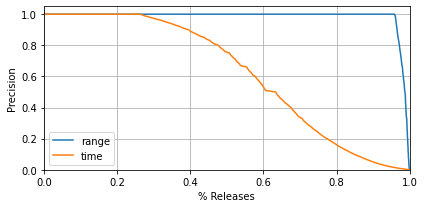

In [19]:
fig, ap = plt.subplots(1,1)
fig.set_size_inches(6,3)
ap.set_xlabel("% Releases")
ap.set_ylabel("Precision")

total = releases.shape[0]
increments = 0.01
y = []
x_precision_range = []
x_precision_time = []
for rng in np.arange(0, 1+increments, increments):
    range_precision_percent = releases[releases['range_precision'] >= rng].shape[0] / total 
    time_precision_percent = releases[releases['time_precision'] >= rng].shape[0] / total 
    x_precision_range.append(range_precision_percent)
    x_precision_time.append(time_precision_percent)
    y.append(rng)

y.append(1)
x_precision_range.append(0)
x_precision_time.append(0)

ap.plot(x_precision_range,y, label='range')
ap.plot(x_precision_time,y, label='time')
ap.legend(loc='lower left')
ap.set_xlim((0,1))
ap.set_ylim((0,1.05))
ap.xaxis.grid()
ap.yaxis.grid()

plt.tight_layout()
fig.savefig(FIGDIR+'release_precision')

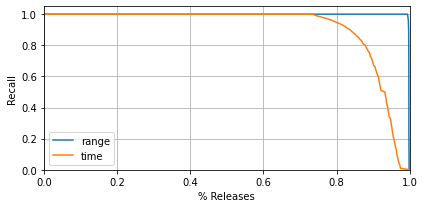

In [20]:
fig, ar = plt.subplots(1,1)
fig.set_size_inches(6,3)

ar.set_xlabel("% Releases")
ar.set_ylabel("Recall")

total = releases.shape[0]
increments = 0.01
y = []
x_recall_range = []
x_recall_time = []
for rng in np.arange(0, 1+increments, increments):
    range_recall_percent = releases[releases['range_recall'] >= rng].shape[0] / total 
    time_recall_percent = releases[releases['time_recall'] >= rng].shape[0] / total 
    x_recall_range.append(range_recall_percent)
    x_recall_time.append(time_recall_percent)
    
    y.append(rng)

y.append(1)
x_recall_range.append(0)
x_recall_time.append(0)

ar.plot(x_recall_range,y, label='range')
ar.plot(x_recall_time,y, label='time')
ar.legend(loc='lower left')
ar.set_xlim((0,1))
ar.set_ylim((0,1.05))
ar.xaxis.grid(which='both')
ar.yaxis.grid()

plt.tight_layout()
fig.savefig(FIGDIR+'release_recall')

In [21]:
releases.groupby(['lang','project']).mean().groupby('lang').mean()[['range_precision','range_recall','time_precision','time_recall']]

,range_precision,range_recall,time_precision,time_recall
lang,,,,
c,0.989246,0.991885,0.763420,0.928667
c#,0.972875,0.983214,0.693249,0.899657
c++,0.984118,0.999120,0.564558,0.876552
go,0.996905,0.999646,0.688852,0.926211
java,0.979764,0.996569,0.544477,0.920623
javascript,0.992503,0.999545,0.648513,0.907081
php,0.970885,0.998934,0.585552,0.920980
python,0.993728,0.998673,0.647853,0.921674
ruby,0.998150,0.999520,0.754143,0.927710


In [22]:
releases.groupby(['lang','project']).mean().mean()[['range_precision','range_recall','time_precision','time_recall']]

range_precision    0.986089
range_recall       0.996536
time_precision     0.655773
time_recall        0.911995
dtype: float64

In [23]:
releases.groupby(['project']).mean()[['range_precision','range_recall','time_precision','time_recall']].sort_values('range_recall')

,range_precision,range_recall,time_precision,time_recall
project,,,,
dotnet/efcore,0.861097,0.907146,0.363637,0.775465
taosdata/TDengine,0.899112,0.919301,0.454907,0.819983
jellyfin/jellyfin,0.928050,0.966667,0.368276,0.909911
Wox-launcher/Wox,0.973684,0.973684,0.741645,0.936863
cefsharp/CefSharp,0.980903,0.984641,0.541150,0.784172
alibaba/fastjson,0.967328,0.988636,0.584946,0.957588
apache/dubbo,0.985109,0.988803,0.439195,0.832963
ionic-team/ionic-framework,0.964719,0.990948,0.656842,0.885974
spring-projects/spring-framework,0.986764,0.992801,0.369032,0.927707


In [24]:
releases[releases.project == "sinatra/sinatra"].sort_values('range_recall')

,project,name,lang,head,time,commits,range_commits,range_tpos,range_fpos,range_fneg,time_commits,time_tpos,time_fpos,time_fneg,range_precision,range_recall,time_precision,time_recall
0,sinatra/sinatra,0.0.1,ruby,72be291da2bf7a5e2dacf8b9119a258d8db53c43,2007-09-08 23:51:24+00:00,1,1,1,0,0,1,1,0,0,1.0,1.0,1.000000,1.000000
68,sinatra/sinatra,1.3.5,ruby,f4364d44f709b248aaa8f0661e2f883ae73ade01,2013-02-25 10:09:26+00:00,0,0,0,0,0,0,0,0,0,1.0,1.0,1.000000,1.000000
67,sinatra/sinatra,v1.3.5,ruby,f4364d44f709b248aaa8f0661e2f883ae73ade01,2013-02-25 10:09:25+00:00,12,12,12,0,0,53,12,41,0,1.0,1.0,0.226415,1.000000
66,sinatra/sinatra,1.3.4,ruby,bc21cf1b983384b20f5572da0db529bf376ff1a3,2013-01-26 22:18:45+00:00,0,0,0,0,0,0,0,0,0,1.0,1.0,1.000000,1.000000
65,sinatra/sinatra,v1.3.4,ruby,bc21cf1b983384b20f5572da0db529bf376ff1a3,2013-01-26 22:18:44+00:00,27,27,27,0,0,144,27,117,0,1.0,1.0,0.187500,1.000000
64,sinatra/sinatra,v1.3.3,ruby,77346226dbb9492993accee2d042bfe6c9ae036c,2012-08-19 12:55:02+00:00,0,0,0,0,0,0,0,0,0,1.0,1.0,1.000000,1.000000
63,sinatra/sinatra,1.3.3,ruby,77346226dbb9492993accee2d042bfe6c9ae036c,2012-08-19 12:55:02+00:00,92,92,92,0,0,411,92,319,0,1.0,1.0,0.223844,1.000000
62,sinatra/sinatra,v1.3.2,ruby,e111243e813ede1f0f4c6918d9a8cc029e776fc3,2011-12-30 12:55:49+00:00,0,0,0,0,0,0,0,0,0,1.0,1.0,1.000000,1.000000
61,sinatra/sinatra,1.3.2,ruby,e111243e813ede1f0f4c6918d9a8cc029e776fc3,2011-12-30 12:55:49+00:00,91,91,91,0,0,136,91,45,0,1.0,1.0,0.669118,1.000000
60,sinatra/sinatra,1.3.1,ruby,ea57aaaa9671124279c3ae4690c58a1c5f05be78,2011-10-05 01:29:29+00:00,0,0,0,0,0,0,0,0,0,1.0,1.0,1.000000,1.000000
